In [18]:
import tensorflow as tf
from keras import layers

In [19]:
# Define the generator network
generator = tf.keras.Sequential([
    layers.Dense(128, input_shape=(100,), activation='relu'),
    layers.Dense(128, input_shape=(100,), activation='relu'),
    layers.Dense(784, activation='sigmoid'),
    layers.Reshape((28, 28, 1))
])

In [20]:
# Define the discriminator network
discriminator = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [21]:
# Define the GAN model
gan_input = tf.keras.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)


In [22]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
# Load the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [24]:
# Train the GAN
for epoch in range(500):
    # Train the discriminator
    noise = tf.random.normal((x_train.shape[0], 100))
    generated_images = generator(noise)
    real_images = x_train
    combined_images = tf.concat([generated_images, real_images], axis=0)
    labels = tf.concat([tf.ones((x_train.shape[0], 1)), tf.zeros((x_train.shape[0], 1))], axis=0)
    discriminator_loss = discriminator.train_on_batch(combined_images, labels)

    # Train the generator
    noise = tf.random.normal((x_train.shape[0], 100))
    misleading_labels = tf.zeros((x_train.shape[0], 1))
    gan_loss = gan.train_on_batch(noise, misleading_labels)

    # Print the loss
    print('Epoch:', epoch)
    print('Discriminator loss:', discriminator_loss)
    print('Generator loss:', gan_loss)


Epoch: 0
Discriminator loss: 0.8340027928352356
Generator loss: 1.6290143728256226
Epoch: 1
Discriminator loss: 0.8990914225578308
Generator loss: 1.2336373329162598
Epoch: 2
Discriminator loss: 0.9727002382278442
Generator loss: 0.9558166861534119
Epoch: 3
Discriminator loss: 1.1214215755462646
Generator loss: 0.7503274083137512
Epoch: 4
Discriminator loss: 1.2177469730377197
Generator loss: 0.5878336429595947
Epoch: 5
Discriminator loss: 1.2717525959014893
Generator loss: 0.4919639229774475
Epoch: 6
Discriminator loss: 1.3409775495529175
Generator loss: 0.4177081286907196
Epoch: 7
Discriminator loss: 1.3992565870285034
Generator loss: 0.3501436114311218
Epoch: 8
Discriminator loss: 1.4453234672546387
Generator loss: 0.2984420955181122
Epoch: 9
Discriminator loss: 1.498719573020935
Generator loss: 0.26658713817596436
Epoch: 10
Discriminator loss: 1.5376615524291992
Generator loss: 0.24178430438041687
Epoch: 11
Discriminator loss: 1.5777511596679688
Generator loss: 0.22186578810214996


This code generates 16 random noise vectors, passes them through the generator, and displays the resulting images. The imshow() function from Matplotlib is used to display the images in a grid. Note that we need to rescale the pixel values of the generated images from the range [-1,1] to [0,1] to be able to display them using imshow(). The output of the generator should ideally look like realistic images that resemble the training data. If the generator has not learned to create realistic images, the output will look random or noisy.

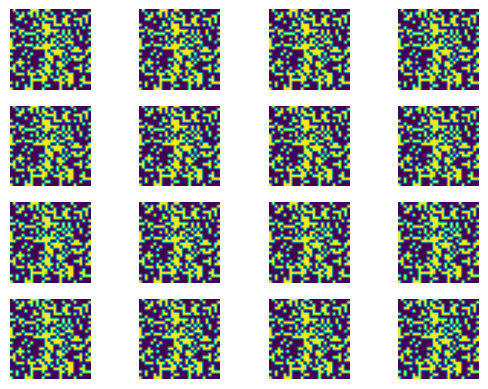

In [25]:
import matplotlib.pyplot as plt

# Generate some images for visualization
noise = tf.random.normal((16, 100))
generated_images = generator(noise)
generated_images = (generated_images + 1) / 2.0 # Rescale to [0,1]
fig, axs = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(generated_images[i*4+j])
        axs[i,j].axis('off')
plt.show()
